# Value vs Growth Investing

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

import utils

C:\Users\tomw1\AppData\Local\Temp\ipykernel_4416\840712921.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
START = dt.date(2020, 1, 1)
END = dt.date.today()

## Rules

1. Calculate a ratio between the value and growth assets i.e GROWTH / VALUE.
2. Calculate the 10- and 40-week moving averages.
3. Buy growth when the fast-moving average crosses over the slow-moving average of the ratio.
4. Buy value when the slow-moving average crosses over the fast-moving average of the ratio.

In [3]:
VALUE = "IUSV"
GROWTH = "IUSG"

LEVERAGE = False

SHORT_MA = 10
LONG_MA = 40

In [4]:
value = yf.download(VALUE, progress=False)["Adj Close"].to_frame(name=VALUE)
value[f"{VALUE}_ret"] = value[VALUE].pct_change()
value[f"{VALUE}_ret_shifted"] = value[f"{VALUE}_ret"].shift(-1)
value.head(5)

C:\Users\tomw1\AppData\Local\pypoetry\Cache\virtualenvs\quantified-strategies-wFBlb7GR-py3.11\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,IUSV,IUSV_ret,IUSV_ret_shifted
Date,,,
2000-08-04,14.133514,NaN,0.000000
2000-08-07,14.133514,0.000000,0.003047
2000-08-08,14.176580,0.003047,0.000000
2000-08-09,14.176580,0.000000,0.000000
2000-08-10,14.176580,0.000000,0.000000


In [5]:
growth = yf.download(GROWTH, progress=False)["Adj Close"].to_frame(name=GROWTH)
growth[f"{GROWTH}_ret"] = growth[GROWTH].pct_change()
growth[f"{GROWTH}_ret_shifted"] = growth[f"{GROWTH}_ret"].shift(-1)
growth.head(5)

C:\Users\tomw1\AppData\Local\pypoetry\Cache\virtualenvs\quantified-strategies-wFBlb7GR-py3.11\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,IUSG,IUSG_ret,IUSG_ret_shifted
Date,,,
2000-07-28,24.698435,NaN,0.019912
2000-07-31,25.190241,0.019912,-0.001905
2000-08-01,25.142263,-0.001905,0.010258
2000-08-02,25.400167,0.010258,-0.032822
2000-08-03,24.566486,-0.032822,0.036865


In [6]:
data = pd.concat([value, growth], axis=1)
data = data.loc[(data.index.date >= START) & (data.index.date <= END)]
data.head(5)

,IUSV,IUSV_ret,IUSV_ret_shifted,IUSG,IUSG_ret,IUSG_ret_shifted
Date,,,,,,
2020-01-02,57.768845,0.003174,-0.006960,65.772781,0.012419,-0.006571
2020-01-03,57.366783,-0.006960,0.001434,65.340561,-0.006571,0.004410
2020-01-06,57.449020,0.001434,-0.003499,65.628716,0.004410,-0.001171
2020-01-07,57.248001,-0.003499,0.003032,65.551872,-0.001171,0.005861
2020-01-08,57.421604,0.003032,0.003183,65.936043,0.005861,0.009614


In [7]:
# 1. Calculate a ratio between the value and growth assets i.e GROWTH / VALUE.
data["G/V ratio"] = data[GROWTH] / data[VALUE]
data.head(5)

,IUSV,IUSV_ret,IUSV_ret_shifted,IUSG,IUSG_ret,IUSG_ret_shifted,G/V ratio
Date,,,,,,,
2020-01-02,57.768845,0.003174,-0.006960,65.772781,0.012419,-0.006571,1.138551
2020-01-03,57.366783,-0.006960,0.001434,65.340561,-0.006571,0.004410,1.138996
2020-01-06,57.449020,0.001434,-0.003499,65.628716,0.004410,-0.001171,1.142382
2020-01-07,57.248001,-0.003499,0.003032,65.551872,-0.001171,0.005861,1.145051
2020-01-08,57.421604,0.003032,0.003183,65.936043,0.005861,0.009614,1.148279


In [8]:
# 2. Calculate the 10- and 40-week moving averages.
data["G/V SMA"] = data["G/V ratio"].rolling(window=SHORT_MA).mean()
data["G/V LMA"] = data["G/V ratio"].rolling(window=LONG_MA).mean()
data = data.dropna()
data.dropna().head(5)

,IUSV,IUSV_ret,IUSV_ret_shifted,IUSG,IUSG_ret,IUSG_ret_shifted,G/V ratio,G/V SMA,G/V LMA
Date,,,,,,,,,
2020-02-28,50.723637,-0.013156,0.041434,61.469883,-0.002649,0.047500,1.211859,1.202260,1.179785
2020-03-02,52.825325,0.041434,-0.026120,64.389709,0.047500,-0.028192,1.218917,1.203555,1.181794
2020-03-03,51.445518,-0.026120,0.041563,62.574432,-0.028192,0.040368,1.216324,1.204251,1.183727
2020-03-04,53.583755,0.041563,-0.033595,65.100449,0.040368,-0.033196,1.214929,1.204447,1.185541
2020-03-05,51.783615,-0.033595,-0.018881,62.939400,-0.033196,-0.016176,1.215431,1.205425,1.187300


In [9]:
# Get Positions
data["pos"] = (data["G/V SMA"] > data["G/V LMA"]).astype(int)
data[f"{GROWTH}_pos"] = data["pos"] * (1 + LEVERAGE) + (1 - data["pos"]) * -LEVERAGE
data[f"{VALUE}_pos"] = (1 - data["pos"]) * (1 + LEVERAGE) + data["pos"] * -LEVERAGE

data[f"inv_{GROWTH}_pos"] = 1 - data[f"{GROWTH}_pos"]
data[f"inv_{VALUE}_pos"] = 1 - data[f"{VALUE}_pos"]

data.dropna().head(5)

,IUSV,IUSV_ret,IUSV_ret_shifted,IUSG,IUSG_ret,IUSG_ret_shifted,G/V ratio,G/V SMA,G/V LMA,pos,IUSG_pos,IUSV_pos,inv_IUSG_pos,inv_IUSV_pos
Date,,,,,,,,,,,,,,
2020-02-28,50.723637,-0.013156,0.041434,61.469883,-0.002649,0.047500,1.211859,1.202260,1.179785,1,1,0,0,1
2020-03-02,52.825325,0.041434,-0.026120,64.389709,0.047500,-0.028192,1.218917,1.203555,1.181794,1,1,0,0,1
2020-03-03,51.445518,-0.026120,0.041563,62.574432,-0.028192,0.040368,1.216324,1.204251,1.183727,1,1,0,0,1
2020-03-04,53.583755,0.041563,-0.033595,65.100449,0.040368,-0.033196,1.214929,1.204447,1.185541,1,1,0,0,1
2020-03-05,51.783615,-0.033595,-0.018881,62.939400,-0.033196,-0.016176,1.215431,1.205425,1.187300,1,1,0,0,1


In [10]:
data["strat_ret"] = data[f"{GROWTH}_pos"] * data[f"{GROWTH}_ret_shifted"] + data[f"{VALUE}_pos"] * data[f"{VALUE}_ret_shifted"]
data["inv_strat_ret"] = data[f"inv_{GROWTH}_pos"] * data[f"{GROWTH}_ret_shifted"] + data[f"inv_{VALUE}_pos"] * data[f"{VALUE}_ret_shifted"]
data.dropna().head(5)

,IUSV,IUSV_ret,IUSV_ret_shifted,IUSG,IUSG_ret,IUSG_ret_shifted,G/V ratio,G/V SMA,G/V LMA,pos,IUSG_pos,IUSV_pos,inv_IUSG_pos,inv_IUSV_pos,strat_ret,inv_strat_ret
Date,,,,,,,,,,,,,,,,
2020-02-28,50.723637,-0.013156,0.041434,61.469883,-0.002649,0.047500,1.211859,1.202260,1.179785,1,1,0,0,1,0.047500,0.041434
2020-03-02,52.825325,0.041434,-0.026120,64.389709,0.047500,-0.028192,1.218917,1.203555,1.181794,1,1,0,0,1,-0.028192,-0.026120
2020-03-03,51.445518,-0.026120,0.041563,62.574432,-0.028192,0.040368,1.216324,1.204251,1.183727,1,1,0,0,1,0.040368,0.041563
2020-03-04,53.583755,0.041563,-0.033595,65.100449,0.040368,-0.033196,1.214929,1.204447,1.185541,1,1,0,0,1,-0.033196,-0.033595
2020-03-05,51.783615,-0.033595,-0.018881,62.939400,-0.033196,-0.016176,1.215431,1.205425,1.187300,1,1,0,0,1,-0.016176,-0.018881


In [11]:
data["cum_strat_ret"] = utils.get_cumulative_return(returns=data["strat_ret"], total=False)
data["cum_inv_strat_ret"] = utils.get_cumulative_return(returns=data["inv_strat_ret"], total=False)
data.head(5)

,IUSV,IUSV_ret,IUSV_ret_shifted,IUSG,IUSG_ret,IUSG_ret_shifted,G/V ratio,G/V SMA,G/V LMA,pos,IUSG_pos,IUSV_pos,inv_IUSG_pos,inv_IUSV_pos,strat_ret,inv_strat_ret,cum_strat_ret,cum_inv_strat_ret
Date,,,,,,,,,,,,,,,,,,
2020-02-28,50.723637,-0.013156,0.041434,61.469883,-0.002649,0.047500,1.211859,1.202260,1.179785,1,1,0,0,1,0.047500,0.041434,0.047500,0.041434
2020-03-02,52.825325,0.041434,-0.026120,64.389709,0.047500,-0.028192,1.218917,1.203555,1.181794,1,1,0,0,1,-0.028192,-0.026120,0.017969,0.014232
2020-03-03,51.445518,-0.026120,0.041563,62.574432,-0.028192,0.040368,1.216324,1.204251,1.183727,1,1,0,0,1,0.040368,0.041563,0.059063,0.056386
2020-03-04,53.583755,0.041563,-0.033595,65.100449,0.040368,-0.033196,1.214929,1.204447,1.185541,1,1,0,0,1,-0.033196,-0.033595,0.023906,0.020897
2020-03-05,51.783615,-0.033595,-0.018881,62.939400,-0.033196,-0.016176,1.215431,1.205425,1.187300,1,1,0,0,1,-0.016176,-0.018881,0.007344,0.001621


## Plot Strategy Results

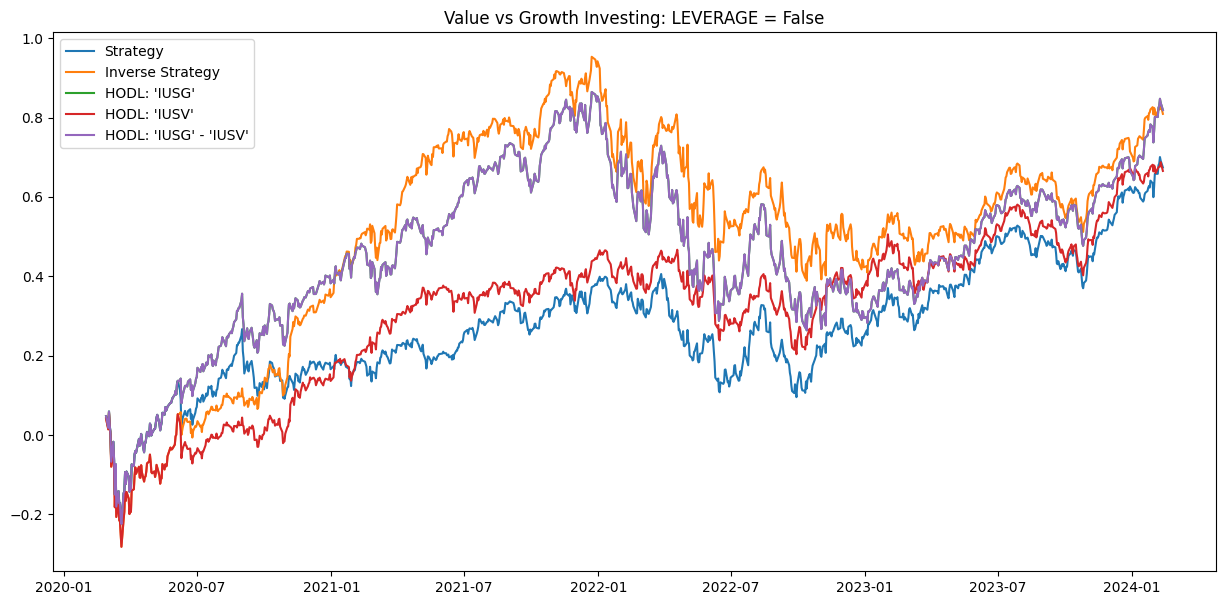

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(data["cum_strat_ret"], label="Strategy")
ax.plot(data["cum_inv_strat_ret"], label="Inverse Strategy")
ax.plot(utils.get_cumulative_return(returns=data[f"{GROWTH}_ret_shifted"], total=False), label=f"HODL: {GROWTH!r}")
ax.plot(utils.get_cumulative_return(returns=data[f"{VALUE}_ret_shifted"], total=False), label=f"HODL: {VALUE!r}")
ax.plot(utils.get_cumulative_return(returns=data[f"{GROWTH}_ret_shifted"]*(1 + LEVERAGE) - LEVERAGE * data[f"{VALUE}_ret_shifted"], total=False), label=f"HODL: {GROWTH!r} - {VALUE!r}")
ax.legend(loc="best")

plt.title(f"Value vs Growth Investing: {LEVERAGE = }")
plt.show()

## Describe Strategy Results

In [13]:
pd.concat([
    utils.describe(returns=data["strat_ret"], daily=True, asset=f"{GROWTH} - {VALUE}"),
    utils.describe(returns=data["inv_strat_ret"], daily=True, asset=f"{VALUE} - {GROWTH}"),
], axis=1)

,0,1
Asset,IUSG - IUSV,IUSV - IUSG
Start,2020-02-28,2020-02-28
End,2024-02-12,2024-02-12
Mean Return,0.06186%,0.07175%
Total Return,67.42%,80.93%
Median Return,0.07349%,0.07889%
1st Quartile,-0.60515%,-0.62976%
3rd Quartile,0.75414%,0.84452%
Std Dev Return,1.41952%,1.55935%
CAGR,5.176 bps,5.955 bps


In [14]:
pd.concat([
    utils.describe(returns=data["strat_ret"], pos=(data[f"{GROWTH}_pos"] > 0).astype(int), daily=True, asset=f"{GROWTH} - {VALUE}"),
    utils.describe(returns=data["strat_ret"], pos=(data[f"{VALUE}_pos"] > 0).astype(int), daily=True, asset=f"{VALUE} - {GROWTH}"),
], axis=1)

,0,1
Asset,IUSG - IUSV,IUSV - IUSG
Start,2020-02-28,2020-02-28
End,2024-02-12,2024-02-12
Mean Return,0.08235%,0.03700%
Total Return,45.77%,14.85%
Median Return,0.09341%,0.06078%
1st Quartile,-0.61752%,-0.58887%
3rd Quartile,0.81324%,0.68381%
Std Dev Return,1.62928%,1.11451%
CAGR,6.905 bps,3.078 bps


In [15]:
pd.concat([
    utils.describe(returns=data[f"{GROWTH}_ret_shifted"], daily=True, asset=GROWTH),
    utils.describe(returns=data[f"{VALUE}_ret_shifted"], daily=True, asset=VALUE)
], axis=1)

,0,1
Asset,IUSG,IUSV
Start,2020-02-28,2020-02-28
End,2024-02-12,2024-02-12
Mean Return,0.07266%,0.06095%
Total Return,81.88%,66.55%
Median Return,0.08057%,0.07209%
1st Quartile,-0.68044%,-0.55379%
3rd Quartile,0.89408%,0.71526%
Std Dev Return,1.58481%,1.39103%
CAGR,6.007 bps,5.123 bps
